#Mosquito Classification

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D, Dropout, Dense, Flatten, Input, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16

import os
from os import path
import glob
import shutil

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/My_NN_Final/Data_Complete/'

2.2.0-rc3


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/My_NN_Final/Data_Complete


In [ ]:
print(tf.__version__)

1.14.0


#Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

def get_callbacks():

   path_checkpoint ='checkpoint_keras'  
   log_dir='logs'
   
   callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                         monitor='val_loss',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         period=1)
   callback_early_stopping = EarlyStopping(monitor='val_loss',
                                           patience=5,
                                           verbose=1)
   callback_tensorboard = TensorBoard(log_dir=log_dir,
                                      histogram_freq=0,
                                      write_graph=False)
   callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                          factor=0.1,
                                          min_lr=1e-4,
                                          patience=3,
                                          verbose=1)

   callbacks = [callback_checkpoint, callback_tensorboard, callback_reduce_lr]

   return callbacks

#Building a CNN

In [ ]:
import glob
from os import path

%cd '/content/drive/My Drive/My_NN_Final'
cur = '/content/drive/My Drive/My_NN_Final'
cur_dir_files = os.listdir()
print('Current dir files: {}'.format(cur_dir_files))
cur_dir = cur_dir_files[0]
print('Inner dir: {}'.format(cur_dir))
filepath = cur + '/' + cur_dir + '/'

def img_delivery(filepath, cno, l):
  list_cur_dir = os.listdir(filepath)
  print('Folders in inner dir: {}'.format(list_cur_dir))
  upto = 0
  P = []
  p = 0
  R = []
  r = 0
  cur_folder = glob.glob(filepath + list_cur_dir[cno] + '/*.tif')
  print(cur_folder)
  print('No. of images in this folder: {}'.format(len(cur_folder)))
  for i in cur_folder:
    upto += 1
    #if(upto == 200):
    #  break
    #print(i)
    img = cv2.imread(i, 0)
    img = cv2.resize(img, (224, 224))
    if(cno == 3): 
      P.append(img)
      l.append(0) 
      p += 1
    elif(cno == 1): 
      R.append(img)
      l.append(1) 
      r += 1
  
  P = np.asarray(P)
  R = np.asarray(R)

  if(cno == 3):
    print('Total Pip images loaded = {}'.format(p))
    print('Pip label shape: {}'.format(len(l)))
    print('Shape Pip: {}'.format(P.shape))
    return P, l
  elif(cno == 1):
    print('Total Res images loaded = {}'.format(r))
    print('Res label shape: {}'.format(len(l)))
    print('Res shape = {}'.format(R.shape))
    return R, l

l = []
Pipset, l = img_delivery(filepath, 3, l)
Resset, l = img_delivery(filepath, 1, l)

/content/drive/My Drive/My_NN_Final
Current dir files: ['Data_Complete', 'Train', 'Test', 'Validation', 'TrainAnnotations.csv', 'ValidationAnnotations.csv', 'TestAnnotations.csv']
Inner dir: Data_Complete
Folders in inner dir: ['Cx_Pipeans_L_Female', 'Cx_Restuans_M_Female', 'Cx_Restuans_L_Female', 'Cx_Pipeans_M_Female', 'TrainAnnotations.csv', 'ValidationAnnotations.csv', 'TestAnnotations.csv', 'logs', 'checkpoint_keras']
['/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_110_3(Left).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_059_1(Left).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_041_3(Right).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_110_3(Right).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_118_1(Left).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_0

In [ ]:
from google.colab.patches import cv2_imshow
full = []
for i in Resset:
  full.append(i)
for i in Pipset:
  full.append(i)

print('Full for now has: {} images'.format(len(full)))

full = np.asarray(full)
full = np.reshape(full, (full.shape[0], full.shape[1], full.shape[2], 1))
print('Full has the shape: {}'.format(full.shape))

Full for now has: 1060 images
Full has the shape: (1060, 224, 224, 1)


In [ ]:
l = keras.utils.to_categorical(l)
print('The label shape is : {}'.format(l.shape))

The label shape is : (1060, 2)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(full, l, shuffle = True)

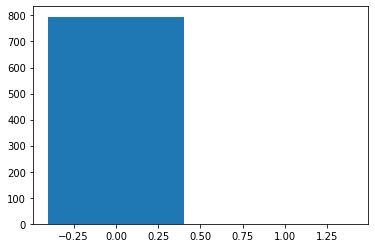

265

In [ ]:
plt.figure()
x = [0, 1]
y = [np.count_nonzero(ytrain), len(ytrain) - np.count_nonzero(ytrain)]
plt.bar(x, y)
plt.show()
len(ytest)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5), input_shape = (224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Conv2D(32,(5,5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 32)      832       
_________________________________________________________________
activation_5 (Activation)    (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
activation_6 (Activation)    (None, 106, 106, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 179776)           

In [ ]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=20, epochs= 30, validation_split= 0.25, callbacks= get_callbacks())

Train on 596 samples, validate on 199 samples
Epoch 1/30
596/596 [==============================] - 39s 66ms/step - loss: 0.7858 - accuracy: 0.5470 - val_loss: 0.6705 - val_accuracy: 0.5628

Epoch 00001: val_loss improved from -inf to 0.67055, saving model to checkpoint_keras
Epoch 2/30
596/596 [==============================] - 39s 66ms/step - loss: 0.6608 - accuracy: 0.6393 - val_loss: 0.6870 - val_accuracy: 0.5678

Epoch 00002: val_loss improved from 0.67055 to 0.68701, saving model to checkpoint_keras
Epoch 3/30
596/596 [==============================] - 40s 66ms/step - loss: 0.7311 - accuracy: 0.6946 - val_loss: 0.7095 - val_accuracy: 0.5628

Epoch 00003: val_loss improved from 0.68701 to 0.70954, saving model to checkpoint_keras
Epoch 4/30
596/596 [==============================] - 40s 67ms/step - loss: 0.4439 - accuracy: 0.8121 - val_loss: 0.7416 - val_accuracy: 0.5930

Epoch 00004: val_loss improved from 0.70954 to 0.74160, saving model to checkpoint_keras

Epoch 00004: ReduceL

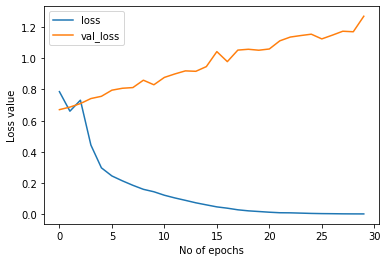

In [ ]:
plt.figure()
plt.xlabel('No of epochs')
plt.ylabel('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

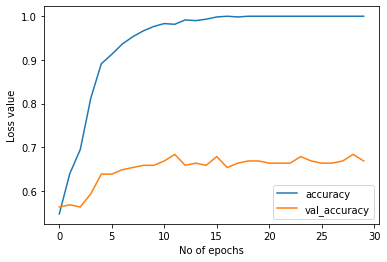

In [ ]:
plt.figure()
plt.xlabel('No of epochs')
plt.ylabel('Loss value')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


In [ ]:
history1 = model.evaluate(xtest, ytest, batch_size = 25)
predictions = model.predict_classes(xtest)
testgt = np.argmax(ytest, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: \n{}'.format(confusion_matrix(testgt, predictions)))
print('Classification Report: \n {}'.format(classification_report(testgt, predictions)))


265/265 [==============================] - 3s 13ms/step
Confusion matrix: 
[[72 67]
 [28 98]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.52      0.60       139
           1       0.59      0.78      0.67       126

    accuracy                           0.64       265
   macro avg       0.66      0.65      0.64       265
weighted avg       0.66      0.64      0.64       265

